# Part III: Testing out the Crazyflie

In this last part of the assignment, we ask that you assemble and configure the Crazyflie and run a simple test script to make sure everything is functioning before the next lab.

First, assemble your Crazyflie. Instructions are located [here](https://www.bitcraze.io/getting-started-with-the-crazyflie-2-0/). **There is one caveat you should be aware of, however.** Instead of using the short connector pins, you need to use the longer set. This is because we are using the FlowDeck expansion deck, which will provide us with significantly more accurate state measurements. There are instructions for mounting expansion decks on the Crazyflie [here](https://www.bitcraze.io/getting-started-with-expansion-decks/). We suggest you push the pins down until they appear on the other side of the flow deck to ensure a secure connection (the pins can be slid further through the black plastic on the connector but it may take some physical effort).

Once the FlowDeck is installed, run the command `cfclient` in terminal and make sure your drone is on. This software is a GUI for interacting with the Crazyflie. Connect the Crazyflie to your computer by USB and turn it on. Then, hit `Scan` in the upper left of the window and from the drop down menu pick `usb://0` and hit `Connect`. This uses the USB interface to connect to the drone. In the console tab (hit `View -> Tabs -> Console` if it isn't present), you should see the following lines if the FlowDeck is connected and functioning:

```
DECK_CORE: 1 deck(s) found
DECK_CORE: Calling INIT on driver bcFlow2 for deck 0
```

The last thing we have to do is set the radio channel the Crazyflie will operate on and will prevent other groups from sending commands to your drone (or your commands to their drone). Hit `Connect -> Configure 2.X`. Set the radio channel option in the dialog box that appears to **your group number**. Also make sure that the radio bandwith is 2 MBit/s (if it's set to something else, change it to 2 MBit/s). Hit `Write` (if you don't, this won't be saved). Now, change the value of the variable in the cell below to your group number.

In [140]:
group_number = 64

Now, plug in the CrazyRadio, hit the `Disconnect` button and `Scan` again. You may need to tell VirtualBox to enable the CrazyRadio by right-clicking on the USB icon in the lower right corner of the window. You should see a URI that looks something like `radio://0/<group_number>/2M`. You don't need to connect to it again, and, in fact, you can't command the drone via Python while it's connected to the GUI. However, you should confirm the URL exists.

To check that everything is working properly, run the following cell. It will print a bunch of logging information (specifically the roll, pitch, and yaw of the drone).

Some tips for working with the Crazyflie:
- The connection with the drone is not always the most stable. Sometimes, a glitch occurs and you may need to restart the drone and / or Jupyter. To restart Jupyter, open the terminal where you ran `jupyter notebook` and hit `Ctrl + C` followed by `y` and `ENTER`.
- Sometimes the drone gets a poor initialization before flying. If it crashes before stabilizing at the hover point, it is unlikely your code is wrong. You may need to just run it again.
- **Turn the quadrotor on when it is plugged in to charge it!** It will not charge when it is powered off so that the onboard processor can monitor the battery and prevent it from overcharging.

In [4]:
# This is an example from the Crazyflie Python API.
# See https://github.com/bitcraze/crazyflie-lib-python/blob/master/examples/basiclogSync.py

import logging
import time

import cflib.crtp
from cflib.crazyflie import Crazyflie
from cflib.crazyflie.log import LogConfig
from cflib.crazyflie.syncCrazyflie import SyncCrazyflie
from cflib.crazyflie.syncLogger import SyncLogger

# Only output errors from the logging framework
logging.basicConfig(level=logging.ERROR)


# Initialize the low-level drivers (don't list the debug drivers)
cflib.crtp.init_drivers(enable_debug_driver=False)
# Scan for Crazyflies and use the first one found
print('Scanning interfaces for Crazyflies...')
available = cflib.crtp.scan_interfaces()
print('Crazyflies found:')
for i in available:
    print(i[0])

if len(available) == 0:
    print('No Crazyflies found, cannot run example')
else:
    lg_stab = LogConfig(name='Stabilizer', period_in_ms=10)
    lg_stab.add_variable('stabilizer.roll', 'float')
    lg_stab.add_variable('stabilizer.pitch', 'float')
    lg_stab.add_variable('stabilizer.yaw', 'float')

    cf = Crazyflie(rw_cache='./cache')
    with SyncCrazyflie(available[0][0], cf=cf) as scf:
        with SyncLogger(scf, lg_stab) as logger:
            endTime = time.time() + 10

            for log_entry in logger:
                timestamp = log_entry[0]
                data = log_entry[1]
                logconf_name = log_entry[2]

                print('[%d][%s]: %s' % (timestamp, logconf_name, data))

                if time.time() > endTime:
                    break


Scanning interfaces for Crazyflies...
Crazyflies found:
radio://0/80/2M
radio://0/80/2M
radio://0/80/2M
Connecting to radio://0/80/2M
Connected to radio://0/80/2M
[115007][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.828571319580078, 'stabilizer.pitch': 26.420269012451172, 'stabilizer.yaw': -37.46330642700195}
[115017][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.714115142822266, 'stabilizer.pitch': 26.355430603027344, 'stabilizer.yaw': -37.39777755737305}
[115027][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.664249420166016, 'stabilizer.pitch': 26.263362884521484, 'stabilizer.yaw': -37.339111328125}
[115037][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.677078247070312, 'stabilizer.pitch': 26.19692611694336, 'stabilizer.yaw': -37.299400329589844}
[115047][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.7308

[115617][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.29735279083252, 'stabilizer.pitch': 26.798173904418945, 'stabilizer.yaw': -36.15144729614258}
[115627][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.29954719543457, 'stabilizer.pitch': 26.85292625427246, 'stabilizer.yaw': -36.134849548339844}
[115637][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.312566757202148, 'stabilizer.pitch': 26.903518676757812, 'stabilizer.yaw': -36.114070892333984}
[115647][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.315385818481445, 'stabilizer.pitch': 26.928272247314453, 'stabilizer.yaw': -36.08169937133789}
[115657][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.301867485046387, 'stabilizer.pitch': 26.916288375854492, 'stabilizer.yaw': -36.03681182861328}
[115667][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'s

[116247][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.259223937988281, 'stabilizer.pitch': 26.83987045288086, 'stabilizer.yaw': -34.60923767089844}
[116257][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.263285636901855, 'stabilizer.pitch': 26.81125831604004, 'stabilizer.yaw': -34.58058166503906}
[116267][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.283074378967285, 'stabilizer.pitch': 26.760364532470703, 'stabilizer.yaw': -34.54652404785156}
[116277][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.161210060119629, 'stabilizer.pitch': 26.72637367248535, 'stabilizer.yaw': -34.46159362792969}
[116287][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.214420318603516, 'stabilizer.pitch': 26.799381256103516, 'stabilizer.yaw': -34.45503234863281}
[116297][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'sta

[116867][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.328963279724121, 'stabilizer.pitch': 26.453685760498047, 'stabilizer.yaw': -33.03688049316406}
[116877][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.338011741638184, 'stabilizer.pitch': 26.462120056152344, 'stabilizer.yaw': -33.007896423339844}
[116887][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.363137245178223, 'stabilizer.pitch': 26.37835121154785, 'stabilizer.yaw': -32.96133041381836}
[116897][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.402256965637207, 'stabilizer.pitch': 26.361093521118164, 'stabilizer.yaw': -32.9171142578125}
[116907][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 13.528351783752441, 'stabilizer.pitch': 26.335277557373047, 'stabilizer.yaw': -32.894813537597656}
[116917][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'

[117497][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 15.750410079956055, 'stabilizer.pitch': 50.45566177368164, 'stabilizer.yaw': -39.82792663574219}
[117507][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 14.719893455505371, 'stabilizer.pitch': 50.87138748168945, 'stabilizer.yaw': -39.13039779663086}
[117517][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 14.48386287689209, 'stabilizer.pitch': 51.02824783325195, 'stabilizer.yaw': -39.354373931884766}
[117527][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 14.637128829956055, 'stabilizer.pitch': 51.02434539794922, 'stabilizer.yaw': -39.96687316894531}
[117537][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 14.443873405456543, 'stabilizer.pitch': 51.43227767944336, 'stabilizer.yaw': -39.830970764160156}
[117547][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stab

[118117][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 0.48217281699180603, 'stabilizer.pitch': 20.89223861694336, 'stabilizer.yaw': -36.21470260620117}
[118127][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 0.24188369512557983, 'stabilizer.pitch': 19.456146240234375, 'stabilizer.yaw': -35.724945068359375}
[118137][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -1.0357171297073364, 'stabilizer.pitch': 17.742633819580078, 'stabilizer.yaw': -35.82695770263672}
[118147][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -1.2727158069610596, 'stabilizer.pitch': 16.601795196533203, 'stabilizer.yaw': -35.57893371582031}
[118157][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -1.0172944068908691, 'stabilizer.pitch': 15.716848373413086, 'stabilizer.yaw': -35.526771545410156}
[118167][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128

[118737][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 6.941977024078369, 'stabilizer.pitch': 6.786412239074707, 'stabilizer.yaw': -15.53739070892334}
[118747][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 6.8625969886779785, 'stabilizer.pitch': 7.530624866485596, 'stabilizer.yaw': -15.009878158569336}
[118757][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 6.934427738189697, 'stabilizer.pitch': 7.577160358428955, 'stabilizer.yaw': -14.482694625854492}
[118767][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 6.806832313537598, 'stabilizer.pitch': 8.186224937438965, 'stabilizer.yaw': -13.96728229522705}
[118777][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 6.774443626403809, 'stabilizer.pitch': 8.95865249633789, 'stabilizer.yaw': -13.363532066345215}
[118787][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabili

[119367][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.6836740970611572, 'stabilizer.pitch': 5.890913009643555, 'stabilizer.yaw': 39.925228118896484}
[119377][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.8694469928741455, 'stabilizer.pitch': 6.093140602111816, 'stabilizer.yaw': 41.23051834106445}
[119387][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -3.0194931030273438, 'stabilizer.pitch': 6.107799530029297, 'stabilizer.yaw': 42.50737762451172}
[119397][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -3.0251128673553467, 'stabilizer.pitch': 5.845107078552246, 'stabilizer.yaw': 43.768768310546875}
[119407][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.977088451385498, 'stabilizer.pitch': 5.405994415283203, 'stabilizer.yaw': 44.99121856689453}
[119417][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stab

[119997][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.539541244506836, 'stabilizer.pitch': 7.938547611236572, 'stabilizer.yaw': 81.45311737060547}
[120007][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.5555882453918457, 'stabilizer.pitch': 7.916705131530762, 'stabilizer.yaw': 82.10331726074219}
[120017][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.4566726684570312, 'stabilizer.pitch': 7.851762294769287, 'stabilizer.yaw': 82.79312896728516}
[120027][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.313514471054077, 'stabilizer.pitch': 7.50538969039917, 'stabilizer.yaw': 83.49736022949219}
[120037][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.047192096710205, 'stabilizer.pitch': 7.202208042144775, 'stabilizer.yaw': 84.22111511230469}
[120047][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilize

[120627][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -1.9129538536071777, 'stabilizer.pitch': 6.297607898712158, 'stabilizer.yaw': 108.21131896972656}
[120637][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.4184253215789795, 'stabilizer.pitch': 5.485373497009277, 'stabilizer.yaw': 107.90873718261719}
[120647][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -2.5838623046875, 'stabilizer.pitch': 5.140674114227295, 'stabilizer.yaw': 107.57642364501953}
[120657][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -1.588141918182373, 'stabilizer.pitch': 4.62672233581543, 'stabilizer.yaw': 107.18263244628906}
[120667][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -1.7660009860992432, 'stabilizer.pitch': 4.159127712249756, 'stabilizer.yaw': 106.8835220336914}
[120677][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabil

[121267][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -14.29150676727295, 'stabilizer.pitch': -11.090909957885742, 'stabilizer.yaw': 89.79757690429688}
[121277][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -14.256321907043457, 'stabilizer.pitch': -10.312417984008789, 'stabilizer.yaw': 89.68490600585938}
[121287][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -13.722458839416504, 'stabilizer.pitch': -9.767398834228516, 'stabilizer.yaw': 90.10094451904297}
[121297][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -13.427824974060059, 'stabilizer.pitch': -9.200237274169922, 'stabilizer.yaw': 90.18780517578125}
[121307][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -12.914094924926758, 'stabilizer.pitch': -9.028899192810059, 'stabilizer.yaw': 90.4111557006836}
[121317][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'

[121897][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 8.94619369506836, 'stabilizer.pitch': -16.568363189697266, 'stabilizer.yaw': 78.61408233642578}
[121907][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 8.726951599121094, 'stabilizer.pitch': -16.533939361572266, 'stabilizer.yaw': 77.52056121826172}
[121917][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 8.10242748260498, 'stabilizer.pitch': -16.74521255493164, 'stabilizer.yaw': 75.8211898803711}
[121927][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 7.793367385864258, 'stabilizer.pitch': -16.722719192504883, 'stabilizer.yaw': 74.29661560058594}
[121937][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 7.794550895690918, 'stabilizer.pitch': -17.070634841918945, 'stabilizer.yaw': 72.79441833496094}
[121947][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilize

[122527][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 8.236526489257812, 'stabilizer.pitch': -9.57742691040039, 'stabilizer.yaw': 60.60546112060547}
[122537][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 7.647997856140137, 'stabilizer.pitch': -10.06212043762207, 'stabilizer.yaw': 60.531742095947266}
[122547][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 7.5125555992126465, 'stabilizer.pitch': -10.216961860656738, 'stabilizer.yaw': 60.592586517333984}
[122557][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 7.232095241546631, 'stabilizer.pitch': -10.376744270324707, 'stabilizer.yaw': 60.31529998779297}
[122567][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 7.294821739196777, 'stabilizer.pitch': -10.312458038330078, 'stabilizer.yaw': 60.18074035644531}
[122577][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabi

[123157][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 11.732980728149414, 'stabilizer.pitch': 11.177029609680176, 'stabilizer.yaw': 58.58100509643555}
[123167][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 11.164149284362793, 'stabilizer.pitch': 11.025557518005371, 'stabilizer.yaw': 59.03749465942383}
[123177][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 10.988119125366211, 'stabilizer.pitch': 10.822539329528809, 'stabilizer.yaw': 59.17068862915039}
[123187][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 10.149312019348145, 'stabilizer.pitch': 10.77273178100586, 'stabilizer.yaw': 60.02908706665039}
[123197][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 9.65648078918457, 'stabilizer.pitch': 10.870726585388184, 'stabilizer.yaw': 60.66706848144531}
[123207][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabiliz

[123787][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 19.898216247558594, 'stabilizer.pitch': 10.55833625793457, 'stabilizer.yaw': 101.2330093383789}
[123797][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 20.35616111755371, 'stabilizer.pitch': 10.730859756469727, 'stabilizer.yaw': 100.6634750366211}
[123807][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 20.84083366394043, 'stabilizer.pitch': 11.645649909973145, 'stabilizer.yaw': 100.38751220703125}
[123817][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 21.456533432006836, 'stabilizer.pitch': 11.650710105895996, 'stabilizer.yaw': 99.68856811523438}
[123827][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 22.309602737426758, 'stabilizer.pitch': 12.20090103149414, 'stabilizer.yaw': 99.62679290771484}
[123837][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabiliz

[124417][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 6.6044182777404785, 'stabilizer.pitch': 54.78373718261719, 'stabilizer.yaw': 156.2647247314453}
[124427][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 3.738013744354248, 'stabilizer.pitch': 55.14238357543945, 'stabilizer.yaw': 159.2290802001953}
[124437][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': 1.455386757850647, 'stabilizer.pitch': 55.50389099121094, 'stabilizer.yaw': 161.4073028564453}
[124447][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -0.21939152479171753, 'stabilizer.pitch': 56.05508041381836, 'stabilizer.yaw': 163.07933044433594}
[124457][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilizer.roll': -6.584911823272705, 'stabilizer.pitch': 57.4060173034668, 'stabilizer.yaw': 171.15084838867188}
[124467][<cflib.crazyflie.log.LogConfig object at 0x7f27c00c5128>]: {'stabilize

# LQR Control of a Quadrotor

In this part, we are going to use a hover state linearization of the quadrotor, like you wrote in the previous lab to allow the quadrotor to hover. First, we are going to import the various classes and functions we need.

In [171]:
from mae345 import plotting, Crazyflie as CF, animate_quad
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve_continuous_are
from IPython.display import HTML

## Problem 1

Now, in the cell below, you will fillout the function that will actually solve the LQR problem. That is, given the matrices $\mathbf{A}, \mathbf{B}, \mathbf{Q}, \mathbf{R}$, you should compute the $K$ that minimizes the LQR cost function. You are encouraged to use the function `scipy.linalg.solve_continuous_are` to solve the CARE. Also, we use the convention that the stabilizing control input is given by $\mathbf{u} = \mathbf{K}\mathbf{x}$ (as opposed to $\mathbf{u} = -\mathbf{K}\mathbf{x}$).

In [18]:
def lqr(A: np.ndarray, B: np.ndarray, Q: np.ndarray, R: np.ndarray) -> np.ndarray:
    P = solve_continuous_are(A, B, Q, R)
    K = -np.linalg.inv(R) @ (B.T @ P)
    return K

## Problem 2

Finally, you will use all the code you have written thus far to actually stabilize your Crazyflie. The following code implements a version of the Crazyflie class from our `mae345` library that uses the linearization and LQR functions you just wrote. This class is useful as it provides simulation and animation functionality to verify your controller is working. It also saves out $\mathbf{K}$ so it can be loaded onto the actual quadrotor for control. You will need to adjust the gains yourself, but we filled in a few for you to get started.

Once you have a set of gains you want to try on the quadrotor, simply navigate to the `~/MAE345` in your terminal and run the command `sudo python3 run_lab1.py`. It will load the feedback matrix corresponding to your LQR controller and run it on the drone. The drone takes off and lands using the Crazyflie's own PID controller, but your LQR controller will stabilize the drone once it is hover a half meter off the ground. The drone beeps when switching controllers. You must submit the following to confirm that you got the drone to hover successfully:
- A video of your drone hovering
- The file `quad_data/quad_traj.npz`
- This notebook file

### LQR Design

The code for this problem is broken into two sections: designing the LQR controller and running the Crazyflie.

The following cell uses the `lqr` function you just wrote in conjunction with our implementation of the linearization function from the previous lab (here as `self.hover_state_linearization()`) to create an instance of the `CrazyflieLQR` class. The details of this process are not important, but this class provides a lot of functionality for designing the LQR controller. It also saves the $\mathbf{K}$ matrix out as `quad_data/lqr_gains.npy`. Run this block to set your gains.

In [172]:
class CrazyflieLQR(CF):
    def __init__(self, Q: np.ndarray, R: np.ndarray, hover_pos: np.ndarray):
        super().__init__()
        self._hover_pos = hover_pos
        self._hover_state = np.concatenate([self._hover_pos, np.zeros(9)])
        A, B =  self.hover_state_linearization()
        self._K = lqr(A, B, Q, R)
        
        print('Using K matrix:')
        print()
        print(self._K)
        
        np.save('quad_data/lqr_gains', self._K)
        
    @property
    def K(self) -> np.ndarray:
        return self._K
    
    def controller(self, state: np.ndarray, t: float) -> np.ndarray:
        return self._K @ (state - self._hover_state) + np.array([self.mass * self.gravity, 0, 0, 0])

# The first argument is the Q matrix, the second is the R matrix
#quad = CrazyflieLQR(np.diag([1000, 1000, 2000, 0.001, 0.001, 1, 100, 100, 1, 0.005, 0.005, 1]), 2 * np.diag([1e5, 6e9, 6e9, 1e4]), np.zeros(3))
#quad = CrazyflieLQR(np.diag([1000, 1000, 2000, 0.01, 0.01, 1, 500, 500, 1, 1, 1, 1]), 2 * np.diag([1e5, 6e8, 6e8, 1e4]), np.zeros(3))
quad = CrazyflieLQR(np.diag([1000, 1000, 2000, 0.001, 0.001, 1, 100, 100, 1, 0.005, 0.005, 1]), 2 * np.diag([1e5, 6e9, 6e9, 1e4]), np.zeros(3))

Using K matrix:

[[ 5.39642869e-14  0.00000000e+00 -1.00000000e-01  0.00000000e+00
  -8.31085299e-14  0.00000000e+00  4.18917632e-14  0.00000000e+00
  -7.74919351e-02  0.00000000e+00  5.08952858e-14  0.00000000e+00]
 [ 0.00000000e+00 -2.88675135e-04  0.00000000e+00 -7.67668375e-04
   0.00000000e+00 -5.04475946e-19  0.00000000e+00 -2.31428618e-04
   0.00000000e+00 -1.47624478e-04  0.00000000e+00 -1.05328735e-19]
 [ 2.88675135e-04  0.00000000e+00  5.50978133e-15  0.00000000e+00
  -7.65087770e-04  0.00000000e+00  2.31099920e-04  0.00000000e+00
   1.80620647e-15  0.00000000e+00 -1.46830037e-04  0.00000000e+00]
 [ 0.00000000e+00 -1.14206704e-13  0.00000000e+00 -2.20951907e-13
   0.00000000e+00 -7.07106781e-03  0.00000000e+00 -8.10930990e-14
   0.00000000e+00 -3.01611123e-14  0.00000000e+00 -7.10074653e-03]]


This next cell simulates the quadrotor flying with a random initial condition for five seconds and plots some of the states. You should see the system stabilize, or your gains will almost certainly not work on the real Crazyflie. Feel free to change the plotted variables.

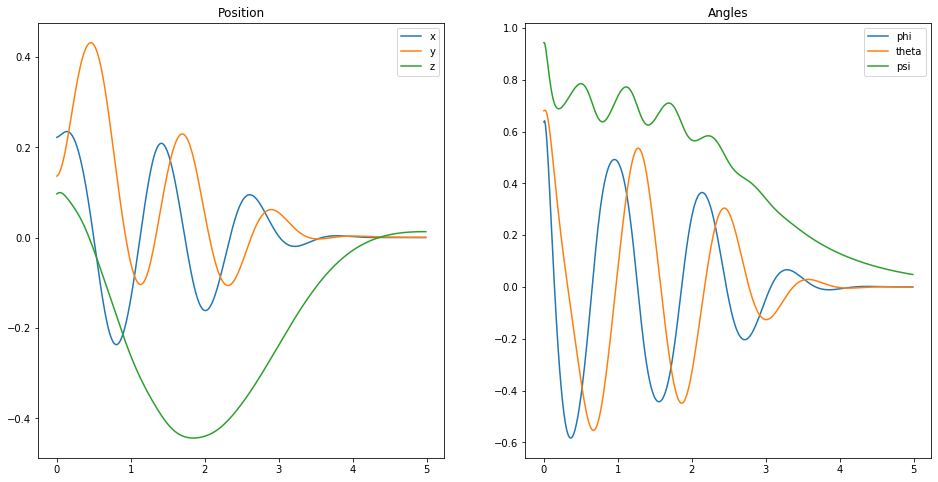

In [139]:
# Uncomment the following line if you want to use the same random initial condition.
# np.random.seed(0)

ic = np.random.rand(12) * 1.2
ic[0:3] = ic[0:3] / 5
ic[6:9] = ic[6:9] / 5

times, states, inputs = quad.simulate(ic, 5, 0.01, clip_input=False)

#%matplotlib notebook
plt.rcParams["figure.figsize"] = (16,8)
fig = plt.figure()

ax = fig.add_subplot(121, title='Position')
ax.plot(times, states[0, :], label='x')
ax.plot(times, states[1, :], label='y')
ax.plot(times, states[2, :], label='z')
ax.legend()

ax = fig.add_subplot(122, title='Angles')
ax.plot(times, states[3, :], label='phi')
ax.plot(times, states[4, :], label='theta')
ax.plot(times, states[5, :], label='psi')
ax.legend()

This cell optionally animates the simulation data computed and plotted in the previous cell. To run it, you need to install FFMPEG. This is done by running the command `sudo apt install ffmpeg` in your terminal (the password you have to enter when prompted is `mae345`).

In [9]:
HTML(animate_quad(0.1, states).to_html5_video())

Finally, this cell plots the result of your physical experiments, i.e. the data logged by the most recent run of `run_lab1.py` in `quad_data/quad_traj.npz`. If you run it before flying the quadrotor, it will error since there is currently no flight data present.

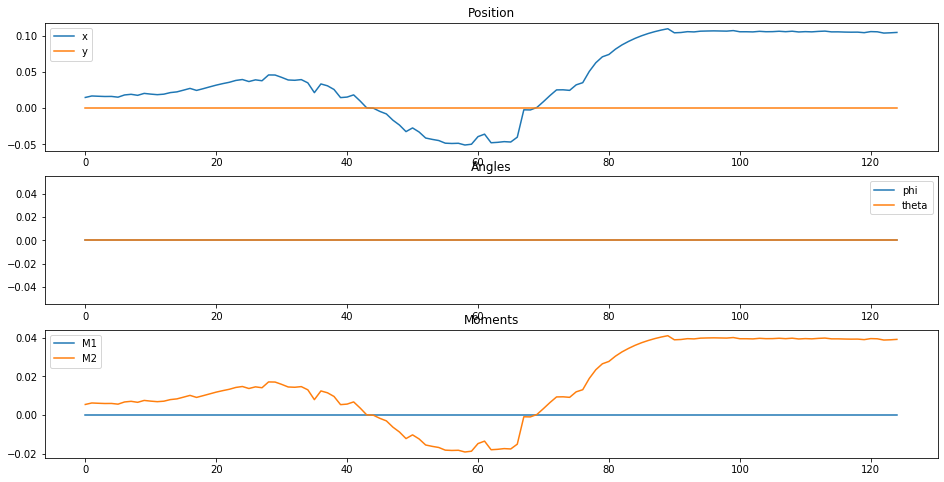

In [167]:
import os

if os.path.isfile('quad_data/quad_traj.npz'):
    npzfile = np.load('quad_data/quad_traj.npz')

    plt.rcParams["figure.figsize"] = (16,8)
    fig = plt.figure()

    ax = fig.add_subplot(311, title='Position')
    ax.plot(npzfile['e_x'][:125], label='x')
    ax.plot(npzfile['e_y'][:125], label='y')
    ax.legend()

    ax = fig.add_subplot(312, title='Angles')
    ax.plot(npzfile['e_roll'][:125], label='phi')
    ax.plot(npzfile['e_pitch'][:125], label='theta')
    ax.legend()

    ax = fig.add_subplot(313, title='Moments')
    ax.plot(npzfile['u2_pwm'][:125] / (2 ** 15), label='M1')
    ax.plot(npzfile['u3_pwm'][:125] / (2 ** 15), label='M2')
    ax.legend()
else:
    print('No flight data found.')

### Running the Quadrotor

#### Setup

Now that you have a set of LQR gains you are happy with trying out, it's time to put them on the quadrotor. First, you need to flash the quadrotor with our modified version of the Crazyflie's firmware. Our modifications apply the LQR control law in real time --- i.e. much faster than we could do with Python over the radio.

**You only need to do this successfully once.** First, power the drone off. Then, hold the power switch down for about 3 seconds until the two blue LEDs flash in sync. Then, open up your terminal and enter the following two commands:

``
cd ~/crazyflie-firmware
make cload
``

Once this is completed, your Crazyflie should restart and play a jingle. If all the lights are on, not flashing, and no jingle plays, repeat the flashing process.

#### Flying

To test out the quadrotor, simply run the cell below after placing it in the netted area. If you seen an error about something missing in the Log TOC (e.g. `stabilizer.controller not in param TOC`), this most likely means your computer lost connection with the drone midflight.

In [170]:
import logging
import random
import time
import numpy as np

import cflib.crtp
from cflib.crazyflie import Crazyflie
from cflib.crazyflie.syncCrazyflie import SyncCrazyflie
from cflib.crazyflie.log import LogConfig
from cflib.crazyflie.syncLogger import SyncLogger

URI = f'radio://0/{group_number}/2M'

# Only output errors from the logging framework
logging.basicConfig(level=logging.ERROR)

log_keys = ['e_x',
            'e_y',
            'e_roll',
            'e_pitch',
            'u2_pwm',
            'u3_pwm',]

other_log_keys = []

if __name__ == '__main__':
    cflib.crtp.init_drivers(enable_debug_driver=False)

    with SyncCrazyflie(URI, cf=Crazyflie(rw_cache='./cache')) as scf:
        cf = scf.cf

        lg_stab = LogConfig(name='LQR', period_in_ms=10)
        lg_data = {}

        for key in log_keys:
            lg_stab.add_variable('ctrlLQR.' + key, 'float')
            lg_data[key] = []

        for key in other_log_keys:
            lg_stab.add_variable( key, 'float')
            lg_data[key.split('.')[1]] = []

        for i in range(4):
            for j in range(12):
                cf.param.set_value(f'ctrlLQR.k{i + 1}{j + 1}', '{:.10f}'.format(quad.K[i, j]))

        print('Loaded LQR gain matrix.')
        print('Initializing as PID')
        cf.param.set_value('stabilizer.controller', '1')

        cf.param.set_value('kalman.resetEstimation', '1')
        time.sleep(0.1)
        cf.param.set_value('kalman.resetEstimation', '0')
        time.sleep(2)

        print('Reset Kalman filter.')
        print('Taking off!')

        for y in range(10):
            cf.commander.send_hover_setpoint(0, 0, 0, y / 25)
            #cf.commander.send_stop_setpoint()
            time.sleep(0.1)

        for _ in range(50):
            cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
            #cf.commander.send_stop_setpoint()
            time.sleep(0.1)

        print('Switching to LQR!')
        cf.param.set_value('stabilizer.controller', '3')

        with SyncLogger(scf, lg_stab) as logger:
            t_start = time.time()
            entry_count = 0

            for log_entry in logger:
                cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
                for key, value in log_entry[1].items():
                    lg_data[key.split('.')[1]].append(value)

                entry_count += 1

                if time.time() - t_start > 5:
                    break

        print('Saving data...')
        for key in lg_data.keys():
            lg_data[key] = np.array(lg_data[key])

        np.savez('quad_data/quad_traj', **lg_data)

        print('Switching to PID!')
        cf.param.set_value('stabilizer.controller', '1')

        for _ in range(60):
            cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
            time.sleep(0.1)

        for y in range(10):
            cf.commander.send_hover_setpoint(0, 0, 0, (10 - y) / 25)
            time.sleep(0.1)

        for i in range(10):
            cf.commander.send_stop_setpoint()
            time.sleep(0.1)

print('Done!') 

Connecting to radio://0/64/2M
Connected to radio://0/64/2M
Loaded LQR gain matrix.
Initializing as PID
Reset Kalman filter.
Taking off!
Switching to LQR!
Saving data...
Switching to PID!
Done!


In [11]:
A, B = quad.hover_state_linearization()

In [12]:
A

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,
        -0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         1. ],
       [ 0. ,  0. ,  0. ,  0. , -9.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  9.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0. ,
        -0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  

In [100]:
npzfile['e_x']

array([-6.41800184e-03, -6.30593952e-03, -6.46288972e-03, -6.47739787e-03,
       -6.41353708e-03, -5.96558163e-03, -7.12731062e-03, -6.56340597e-03,
       -7.00388337e-03, -6.01783954e-03, -4.70225001e-03, -5.54206641e-03,
       -6.45746524e-03, -7.02126697e-03, -4.41193487e-03, -4.51908167e-03,
       -2.12916359e-03, -4.29882668e-03, -1.46377599e-03, -2.51399004e-03,
       -1.92609755e-03, -1.44783827e-03,  1.66288950e-03, -2.33509403e-04,
        1.63929700e-03,  3.75688868e-03,  3.22143175e-03,  5.53258089e-03,
        6.82006683e-03,  8.17855448e-03,  8.17361195e-03,  1.31142018e-02,
        1.04251942e-02,  1.38812289e-02,  1.45457117e-02,  1.73797403e-02,
        1.75630450e-02,  2.07692813e-02,  2.24352535e-02,  2.30894312e-02,
        2.67517343e-02,  2.90808063e-02,  3.01875584e-02,  3.53077799e-02,
        3.63229737e-02,  3.92397754e-02,  4.11094576e-02,  4.31511439e-02,
        4.78328541e-02,  4.99022715e-02,  5.19801937e-02,  5.74918464e-02,
        5.95788658e-02,  

In [137]:
quad._K[1, :]

array([ 0.00000000e+00, -9.12870929e-04,  0.00000000e+00, -1.96951520e-03,
        0.00000000e+00, -6.03393362e-20,  0.00000000e+00, -8.85204904e-04,
        0.00000000e+00, -2.38209846e-04,  0.00000000e+00, -6.02495192e-20])

In [164]:
import logging
import random
import time
import numpy as np

import cflib.crtp
from cflib.crazyflie import Crazyflie
from cflib.crazyflie.syncCrazyflie import SyncCrazyflie
from cflib.crazyflie.log import LogConfig
from cflib.crazyflie.syncLogger import SyncLogger

URI = f'radio://0/{group_number}/2M'

# Only output errors from the logging framework
logging.basicConfig(level=logging.ERROR)

log_keys = ['e_vx']

other_log_keys = []

IDX = 11

cflib.crtp.init_drivers(enable_debug_driver=False)

with SyncCrazyflie(URI, cf=Crazyflie(rw_cache='./cache')) as scf:
    cf = scf.cf

    lg_stab = LogConfig(name='LQR', period_in_ms=10)
    lg_data = {}

    for key in log_keys:
        lg_stab.add_variable('ctrlLQR.' + key, 'float')
        lg_data[key] = []

    for key in other_log_keys:
        lg_stab.add_variable( key, 'float')
        lg_data[key.split('.')[1]] = []

    for i in range(4):
        for j in range(12):
            cf.param.set_value(f'ctrlLQR.k{i + 1}{j + 1}', '{:.10f}'.format(quad.K[i, j]))

    print('Loaded LQR gain matrix.')

    cf.param.set_value(f'ctrlLQR.idx', f'{IDX}')

    cf.param.set_value('stabilizer.controller', '3')

    cf.param.set_value('kalman.resetEstimation', '1')
    time.sleep(0.1)
    cf.param.set_value('kalman.resetEstimation', '0')
    time.sleep(2)

    print('Reset Kalman filter.')
    print('Taking off!')

    with SyncLogger(scf, lg_stab) as logger:
        t_start = time.time()

        for log_entry in logger:
            cf.commander.send_hover_setpoint(0, 0, 0, 0.5)
            print(log_entry[1])

            if time.time() - t_start > 100:
                break

cf.param.set_value('stabilizer.controller', '1')
cf.commander.send_stop_setpoint()

Connecting to radio://0/64/2M
Connected to radio://0/64/2M
Loaded LQR gain matrix.
Reset Kalman filter.
Taking off!
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ct

{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.

{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.e_vx': 0.0}
{'ctrlLQR.

KeyboardInterrupt: 

In [144]:
cf.param.set_value('stabilizer.controller', '1')
cf.commander.send_stop_setpoint()

KeyError: 'stabilizer.controller not in param TOC'

In [151]:
quad.K[0, 2]

-0.10000000000000017